Derivatives
- Randomly searching for weights and biases does not work because the number of possible combinations of them is infinite
- the loss function is not part of the final output of the network , but is impacted by the weights and biases.
- impacts of samples, weights, and biases on the network output can be/are non-linear
- need to use derivatives, gradients, chain rule to perform backpropagation to minimize the loss

Slope
- change in function's y value divided by change in x value = delta y / delta x ; (x1 - x0) / (y1 - y0)
- can use this to calculate linear slopes or point estimates of slopes for non linear functions
- can do point estimate of non linear function by calculating the change in y for a very small change in x (not too small though that the computer rounds it to 0)
- for non linear: slope depends on where you measure it (ie slope is function of x)

In [12]:
import numpy as np

#linear function
def f(x):
    return 2*x

x = np.array(range(5))
y = f(x)

print("Linear Func Slope:", (y[1] - y[0]) / (x[1] - x[0]))


#non-linear function

def f(x):
    return 2*x**2

x = np.array(range(5))
y = f(x)

print("Non Linear func Slope 1st 2:", (y[1] - y[0]) / (x[1] - x[0]))
print("Non Linear func Slope Later Values:", (y[3] - y[2]) / (x[3] - x[2]))


p2_delta = 0.0001
x1 = 1
x2 = x1 + p2_delta # add delta

y1 = f(x1) # result at the derivation point
y2 = f(x2) # result at the other, close point

approximate_derivative = (y2-y1)/(x2-x1) #this section of the curve just happened to produce slope of 4, would've been different else where
print(approximate_derivative)


Linear Func Slope: 2.0
Non Linear func Slope 1st 2: 2.0
Non Linear func Slope Later Values: 10.0
4.0001999999987845


Numerical Derivative
- the slope of a tangent line - a line between two points on the curve defined by two infintensimally close points, aka the instantaneous slope, or the derivative
- the tangent line to a point on a function is tells you the instantaneous rate of change, and as x changes this value changes, so it is impacted by x
- Can numerically estimate this by calculating the differnce in y values between two sufficiently close points
- this method is not accurate or efficient enough to be used in a NN
- would require calculating model loss, then adjusting 1 parameter by very small value, then recalculating model loss to estimate change in loss, then revert back and repeat for every parameter

(0, 0) (0.0001, 2e-12)
Approximate derivative for f(x)where x = 0 is 1.9999999999999997e-08
(1, 2) (1.0001, 2.0006000600019997)
Approximate derivative for f(x)where x = 1 is 6.0006000199981315
(2, 16) (2.0001, 16.002400120002005)
Approximate derivative for f(x)where x = 2 is 24.00120001999448
(3, 54) (3.0001, 54.00540018000201)
Approximate derivative for f(x)where x = 3 is 54.00180002001748
(4, 128) (4.0001, 128.009600240002)
Approximate derivative for f(x)where x = 4 is 96.00240002009377


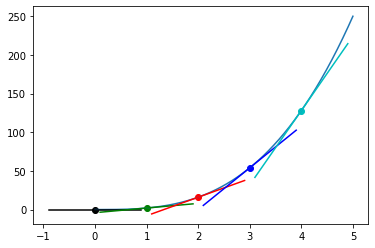

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return 2*x*x**2

x = np.array(np.arange(0,5,.001)) #gives smooth-er curve for parabola

y = f(x)

plt.plot(x , y)

colors = ['k', 'g', 'r', 'b', 'c']

def approximate_tangent_line(x , approximate_derivative): # calcualtes the y value point of the poinrt for the tangent line 
    return (approximate_derivative * x) + b

for i in range(5):
    p2_delta = .0001

    x1 = i
    x2 = x1 + p2_delta

    y1 = f(x1)
    y2 = f(x2)

    print((x1, y1), (x2, y2))

    approximate_derivative = (y2 - y1) / (x2- x1)
    b = y2 - approximate_derivative*x2

    to_plot = [x1-0.9, x1, x1+0.9]

    plt.scatter(x1, y1, c=colors[i]) #plot the dots

    plt.plot([point for point in to_plot], #plot the lines x vals is first arg, y vals is second arg
             [approximate_tangent_line(point, approximate_derivative) for point in to_plot], 
             c=colors[i]
             )

    print('Approximate derivative for f(x)' f'where x = {x1} is {approximate_derivative}')


The Analytical Derivative
- more efficient and precise method of calculting the gradients; however, can be more difficult to analyze the analytical solution for a derivative, whereas numerically, complexity is relatively constant (just use steps described above)
- do reduce the percieved complexity of analytical solutoins, can use easy derivatives or breaking down complex functions via chain rule
- analytical derivate of f noted as f' or d/dx

Simple Derivatives
- derivative of constant is 0 => tangent line is flat and has no slope
- linear function => derivative is constant, the slope of the line, as the tangent line slope is the line slope. 


General Rule: subtract 1 from the exponent and multiply the whole function by the previous exponent. See book
- ex: 3x^2 = 3 * 2 * x^1 = 6x
- f'(x) = n * x ^ (n-1) where f(x) = x^n

Additive: derivatives are additive, thus can break down multinomial functions into separate derivatives and add together again
- ex: d/dx(f(x) + g(x)) = d/dxf(x) + d/dxg(x) 


